<a href="https://colab.research.google.com/github/superahxd/sec1_project/blob/main/sec1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#💥GOAL

다음 분기에 어떤 게임을 설계해야 할까

1. 지역에 따라서 선호하는 게임 장르가 다를까
2. 연도별 게임의 트렌드가 있을까
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

# 🕹️ Data Description
Name : 게임의 이름입니다.

Platform : 게임이 지원되는 플랫폼의 이름입니다.

Year : 게임이 출시된 연도입니다.

Genre : 게임의 장르입니다.

Publisher : 게임을 제작한 회사입니다.

NA_Sales : 북미지역에서의 출고량입니다.

EU_Sales : 유럽지역에서의 출고량입니다.

JP_Sales : 일본지역에서의 출고량입니다.

Other_Sales : 기타지역에서의 출고량입니다.

In [199]:
import pandas as pd

vgames = pd.read_csv('/content/vgames2.csv')

In [200]:
vgames.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [201]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    return float(x)


vgames['NA_Sales']=vgames['NA_Sales'].apply(value_to_float)
vgames['EU_Sales']=vgames['EU_Sales'].apply(value_to_float)
vgames['JP_Sales']=vgames['JP_Sales'].apply(value_to_float)
vgames['Other_Sales']=vgames['Other_Sales'].apply(value_to_float)

In [202]:
def million(x):
 if x <= 100:
   return x * 1000000.0
 else: return x

vgames['NA_Sales']=vgames['NA_Sales'].apply(million)
vgames['EU_Sales']=vgames['EU_Sales'].apply(million)
vgames['JP_Sales']=vgames['JP_Sales'].apply(million)
vgames['Other_Sales']=vgames['Other_Sales'].apply(million)

In [203]:
def year(x):
  if x >= 80 and x <= 100:
   return x + 1900
  elif x < 80:
   return x + 2000
  else : return float(x)

vgames['Year']=vgames['Year'].apply(year)

In [204]:
vgames['Year'].isna().sum()

271

In [205]:
vgames=vgames.iloc[:,1:]
vgames.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0


1. 🌏지역에 따른 게임 장르 선호도

지역에 따라서 선호하는 게임 장르가 다를까



In [206]:
import matplotlib.pyplot as plt
import numpy as np

In [211]:
vgames['Genre'] = vgames['Genre'].dropna()
vgames_1=vgames.iloc[:,3:]
vgames_1

,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,Destineer,40000.0,0.0,0.0,0.0
1,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...,...
16593,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0
16594,Action,Rising Star Games,10000.0,0.0,0.0,0.0
16595,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0
16596,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0


In [214]:
vgames_1= vgames_1.groupby(['Genre']).mean()
genre= vgames_1.index
vgames_1

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,264692.889561,157990.922844,47776.096823,56414.523449
Adventure,82546.875000,50039.062500,40585.937500,13132.812500
Fighting,263518.299882,119504.132231,103116.883117,43258.559622
Misc,235322.952710,122468.281430,60709.342561,42698.961938
Platform,505022.624434,228065.610860,147794.117647,58291.855204
Puzzle,213408.304498,87768.166090,98391.003460,21660.899654
Racing,287361.222848,190748.189863,45374.094932,62027.353178
Role-Playing,215468.644639,123789.615644,232602.832097,38408.631153
Shooter,444892.966361,239334.862385,29266.055046,78478.593272


Text(0.5, 1.0, 'NA_Sales')

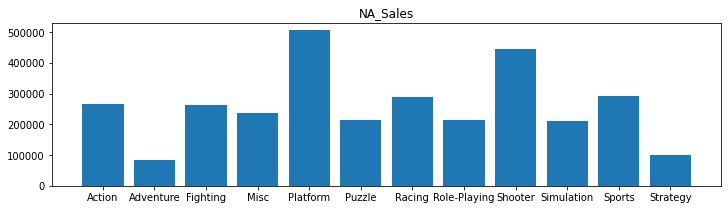

In [237]:
#NA_Sales 그래프
plt.figure(figsize=(12, 3))
NA_genre = np.array(vgames_1['NA_Sales'])
plt.bar(genre, NA_genre)
plt.title("NA_Sales")

Text(0.5, 1.0, 'EU_Sales')

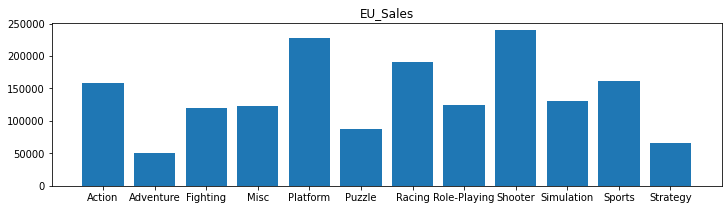

In [240]:
#EU_Sales
plt.figure(figsize=(12, 3))
EU_genre = np.array(vgames_1['EU_Sales'])
plt.bar(genre, EU_genre)
plt.title("EU_Sales")

Text(0.5, 1.0, 'JP_Sales')

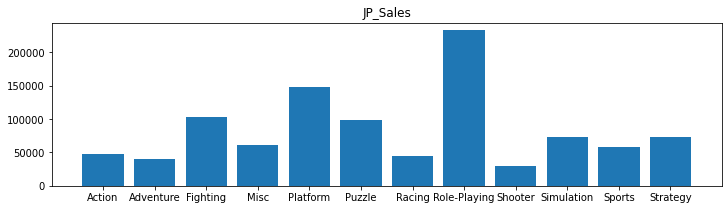

In [238]:
#JP_Sales
plt.figure(figsize=(12, 3))
JP_genre = np.array(vgames_1['JP_Sales'])
plt.bar(genre, JP_genre)
plt.title("JP_Sales")

Text(0.5, 1.0, 'Other_Sales')

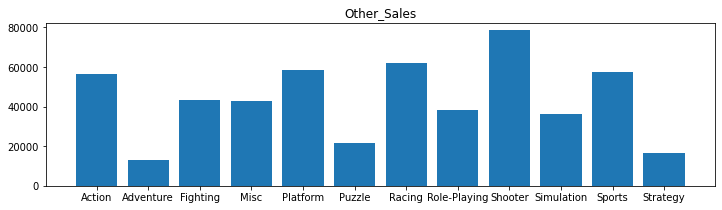

In [239]:
#Other_Sales
plt.figure(figsize=(12, 3))
Other_genre = np.array(vgames_1['Other_Sales'])
plt.bar(genre, Other_genre)
plt.title("Other_Sales")

In [250]:
vgames_1.rank(method='min', ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,5.0,5.0,9.0,5.0
Adventure,12.0,12.0,11.0,12.0
Fighting,6.0,9.0,3.0,6.0
Misc,7.0,8.0,7.0,7.0
Platform,1.0,2.0,2.0,3.0
Puzzle,9.0,10.0,4.0,10.0
Racing,4.0,3.0,10.0,2.0
Role-Playing,8.0,7.0,1.0,8.0
Shooter,2.0,1.0,12.0,1.0



|인기종목 |1st | 2nd | 3rd |
|:-:|:-:|:-:|:-:|
|북미|Platform|Shooter|simulation|
|유럽|Shooter|Platform|Racing|
|일본|Role-Playing|Adventure|Fighting|
|그외|Adventure	|Racing|Platform|

<br/>

|비인기종목 |1st | 2nd | 3rd |
|:-:|:-:|:-:|:-:|
|북미|Adventure	|Strategy|Sports|
|유럽|Adventure	|Strategy|Puzzle|
|일본|Shooter|Platform|Racing|
|그외|Adventure	|Strategy|Platform|
